# Zadanie 04 (a)
---
#### Oblicz numeryczną wartość całki $$\int_{0}^{4} x e^{2x} dx$$ korzystając z metod:
+ metody prostokątów
+ metody trapezów
+ metody Simpsona 1/3


**Punktacja**
+ impementacja metody prostokątów **1p.**
+ impementacja metody trapezów **1p.**
+ impementacja metody Simpsona 1/3 **1p.**
+ wykres przedstawiający wartości całki w zależności od liczby przedziałów użytych do jej obliczenia (dla wszystkich metod) **1p.**


## Metoda prostokątów
---
![title](http://www.if.pw.edu.pl/~ryczkowski/download/MN/04/rectangle.png)

$$I(f) = \sum_{i=1}^{N} f(x_i)(x_{i+1}-x_i) = h\sum_{i=1}^{N} f(x_i)$$

## Metoda trapezów
---

$$I(f) = \frac{h}{2} \sum_{i=1}^{N} \left[ f(x_i)+f(x_{i+1}) \right]$$

## Metoda Simpsona 1/3
---
![title](http://www.if.pw.edu.pl/~ryczkowski/download/MN/04/simpsona13.png)

$$I(f) = \frac{h}{3} \sum_{i=2,4,6}^{N} \left[ f(x_{i-1}) + 4f(x) + f(x_{i+1}) \right] $$

## Wykonanie
---
Wczytanie bibliotek

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

Deklaracja funkcji oraz przedziału dla których liczona będzia całka

In [43]:
f = lambda x: x*np.exp(2*x)
a = 0
b = 4

Implementacja funkcji realizującej metodę prostokątów

In [44]:
def rectangle(func, a, b, N):
    
    I = 0
    h = (b-a)/N
  
    for x in range (N):
        x=x*h+a
        I+=h*f(x)
    
    return I

Sprawdzenie poprawności

In [45]:
print(abs(rectangle(f,a,b,100)-integrate.quad(f, a, b)[0]) < 250)
print(abs(rectangle(f,a,b,100)))

True
4982.02638838


Implementacja funkcji realizującej metodę trapezów

In [46]:
def trapezoidal(func, a, b, N):
    
    I = 0
    h=(b-a)/N
    
    
    for x in range (N):
        x=x*h+a
        I+=(h/2)*(f(x)+f(x+h))
        
        
    return I

Sprawdzenie poprawności

In [47]:
print(abs(trapezoidal(f,a,b,100)-integrate.quad(f, a, b)[0]) < 5)
print(abs(trapezoidal(f,a,b,100)))

True
5220.50302735


Implementacja funkcji realizującej metodę Simpsona 1/3

In [102]:
def simpsona13(func, a, b, N):
    

    I = 0
    h=(b-a)/N
    
    for x in range (0,N,2):
        x=x*h+a
        I+=(h/3)*(f(x)+4*f(x+h)+f(x+2*h))
    return I

Sprawdzenie poprawności

In [103]:
print(abs(simpsona13(f,a,b,100)-integrate.quad(f, a, b)[0]) < 1)
print(abs(simpsona13(f,a,b,100)))

True
5216.92834089


Porównanie zbierzności metod

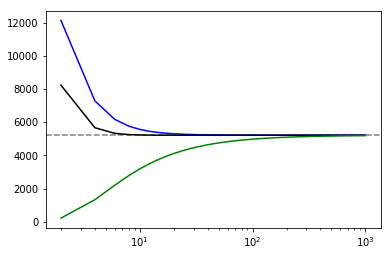

In [113]:
Nmax = 1000
N = range(2,Nmax,2)

tr=[]
re=[]
se=[]
for x in N:
    t=trapezoidal(f,a,b,x)
    tr.append(t)
    s=simpsona13(f,a,b,x)
    se.append(s)
    r=rectangle(f,a,b,x)
    re.append(r)




plt.axhline(y=integrate.quad(f, a, b)[0], ls='--', c='grey')
plt.semilogx(N,tr, c='blue')
plt.semilogx(N,se,c='black')
plt.semilogx(N,re, c='green')
plt.show()

In [101]:

simpsona13(f,a,b,2)

0